### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

* 自变量是"字义与颜色是否一致"，因变量是"读出墨色的时间"

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

* 设字体颜色一致的情况下，样本统计读出墨色的平均时间（均值）为μ0
* 设字体颜色不一致的情况下，样本统计读出墨色的平均时间（均值）为μd
* 由于Stroop效应是说明说字的颜色时会受到字义的干扰，故预期的实际情况应该是μd > μ0，据此设计如下假设：
* 原假设 (H0)：字义与颜色不一致不会导致读出墨色的时间明显变长。μd = μ0
* 备择假设 (H1)：字义与颜色不一致会导致读出墨色的时间明显变长。μd > μ0
* 由于未知样本总体的标准差，且样本量不足30个，故选用采用t检验方法，
* 由于假设主要关注在测试时间是否变长，对于变短的情况不予考虑，且该检验是针对同一组测试者，在不同条件下的测试结果，故应该采用单边配对T检验方法
* 显著性水平选用0.05

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [5]:
# 在这里执行你的分析
# reference the "python for data analysis - CHAPTER 6"
import pandas as pd
import matplotlib
from scipy import stats
from scipy.stats import ttest_rel
df = pd.read_csv('stroopdata.csv')
d_con = df.Congruent
d_inc = df.Incongruent
df.describe()

Congruent  Incongruent
count  24.000000    24.000000
mean   14.051125    22.015917
std     3.559358     4.797057
min     8.630000    15.687000
25%    11.895250    18.716750
50%    14.356500    21.017500
75%    16.200750    24.051500
max    22.328000    35.255000

In [6]:
df.median()

Congruent      14.3565
Incongruent    21.0175
dtype: float64

该数据集的描述性统计指标如上图所示，设颜色与文字一致的情况用下标0标识，颜色与文字不一致的情况下标用d标识。两种情况下该样本所用时间的均值分别为 μ0 = 14.051125 μd  = 22.015917,该样本所用时间的中位数为：m0 = 14.3565，md = 21.0175.该样本所用时间统计的标准差为 σ0 = 3.559358，σd = 4.797057，25分位值分别为 Q1_0 = 11.895250	Q1_d = 18.716750，75分位值 Q3_0 = 16.200750	Q3_d = 24.051500，故 IQR_0 = 4.3055，IQR_d = 5.33475。

(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

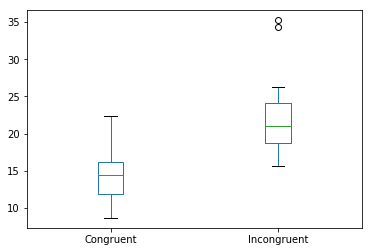

In [7]:
# 在这里创建可视化图表
df.plot.box()

箱体图可以很好的描述数据分布的状态，从上图中可以看到：
* 信息一致的条件下所需测试时间的均值低于不一致条件下测试时间
* 条件不一致的情况下所测得的结果有更高的集中度

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [8]:
# 在这里执行统计检验
stats.ttest_rel(d_con, d_inc, axis=0)

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

显著性水平为α=0.05 置信度为 1-α= 95%
自由度 df = 23
故查表得到 t临界值=1.714

计算可得
p-value = 4.1030005857111781e-08 该值远远小于α=0.05，且statistic=-8.020706944109957 其绝对值大于t临界值1.714，说明μd > μ0，可以拒绝H0，与实际情况一致。由于实际情况是H0错误，且研究结果是拒绝H0，故根据统计结论拒绝零假设。 与原故备选假设成立。
### 结论：字义与颜色不一致会导致读出墨色的时间明显变长。